## **Statistical Learning – Data science - 2021/22 – Exercise 2 - 29/03/2022**
# **Exercise 2: Analysis of Prostate Cancer dataset - linear regression model**
Please, execute the following tasks and provide answers to the proposed questions.

## **Aim of the analysis**:
> We want to examinete correlation between the level of prostate-specific antigen and a number of clinical measures in men who ere about to reveice a radical prostatectomy.


In [1]:
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm

from IPython.display import Image # to visualize images
from tabulate import tabulate # to create tables

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prostate-data/prostate.data
/kaggle/input/prostate-data/tab.png
/kaggle/input/prostate-data/tab2.png


## **1. Open the webpage of the book “The Elements of Statistical Learning”, go to the “Data” section and download the info and data files for the dataset called Prostate**
* Hint: https://web.stanford.edu/~hastie/ElemStatLearn/

## **2. Open the file `prostate.info.txt`**
Hint: please, refer also to Section 3.2.1 (page 49) of the book “The Elements of Statistical Learning” to gather this information

* How many predictors are present in the dataset? What are those names?
> There are 8 predictors:
        1. lcavol (log cancer volume)
        2. lweight (log prostate weight)
        3. age
        4. lbph (log of the amount of benign prostatic hyperplasia)
        5. svi (seminal veiscle invasion)
        6. lcp (log of capsular penetration)
        7. gleason (Gleason score)
        8. pgg45 (percent of Gleason scores 4 or 5)
* How many responses are present in the dataset? What are their names?
> There is one response:
        1. lpsa (log of prostate-specific antigen)
* How did the authors split the dataset in training and test set?
> They randomly split the dataset (containing 97 observations, in `prostate.data`) into a training set of size 67 adn a test set of size 30. In the file `prostate.data` there is a column `train` which is of boolean type in order to distinguish if an observation is used (T) or not (F) to train the model.

## **3. Open the file `prostate.data` by a text editor or a spreadsheet and have a quick look at the data**
* How many observations are present?
> There are 97 observations in total.
* Which is the symbol used to separate the columns?
> To separate the columns there is the escape character `\t` tab.

## **4. Open Kaggle, generate a new kernel and give it the name “SL_EX2_ProstateCancer_Surname”**
> <h2>✅</h2>

## **5. Add the dataset `prostate.data` to the kernel**
* Hint: See the Add Dataset button on the right
* Hint: use import option “Convert tabular files to csv”

> <h2>✅</h2>

## **6. Run the first cell of the kernel to check if the data file is present in folder ../input**
> <h2>✅</h2>

## **7. Add to the first cell new lines to load the following libraries: `seaborn`, `matplotlib.pyplot`, `sklearn.linear_model.LinearRegression`**

> <div class="alert alert-block alert-info">
<b>Tip:</b> We import also `pandas`.</div>

## **8. Add a Markdown cell on top of the notebook, copy and paste in it the text of this exercise and provide in the same cell the answers to the questions that you get step-by-step.**
> <h2>✅</h2>

## **9. Load the Prostate Cancer dataset into a Pandas DataFrame variable called "data"**
* How can you say Python to use the right separator between columns?
> I need to specify `sep='\t` into `read_csv` method in order to load the dataset.

# **Data acquisition**

In [2]:
# Load the Prostate Cancer dataset
data = pd.read_csv('../input/prostate-data/prostate.data',sep='\t')
# data.info() # to check if it is correct

## **10. Display the number of rows and columns of variable data**

In [3]:
[num_rows,num_columns]=data.shape;

print(f"The number of rows is {num_rows} and the number of columns is {num_columns}.")

The number of rows is 97 and the number of columns is 11.


## **11. Show the first 5 rows of the dataset**

In [4]:
data.head(5)

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


## **12. Remove the first column of the dataset which contains observation indices**

In [5]:
print("* Before to drop the first column:")
data.info()
#data1 = data1.drop(columns='Unnamed: 0')
#data1 = data1.drop(labels=['Unnamed: 0'],axis=1)

print("\n* After having dropped the first column:")
data = data.drop(data.columns[0],axis=1) # without specifying the name of the variable (axis=0 indicates rows, axis=1 indicates columns)
data.info()

data['train'].value_counts()

* Before to drop the first column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97 non-null     int64  
 1   lcavol      97 non-null     float64
 2   lweight     97 non-null     float64
 3   age         97 non-null     int64  
 4   lbph        97 non-null     float64
 5   svi         97 non-null     int64  
 6   lcp         97 non-null     float64
 7   gleason     97 non-null     int64  
 8   pgg45       97 non-null     int64  
 9   lpsa        97 non-null     float64
 10  train       97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB

* After having dropped the first column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lwe

T    67
F    30
Name: train, dtype: int64

> <div class="alert alert-block alert-warning">
<b>Warning:</b> Keep attention to do not run the above cell twice. Otherwise it will drop again the first column.
</div>

## **13. Save column train in a new variable called "train" and having type `Series` (the Pandas data structure used to represent DataFrame columns), then drop the column train from the data DataFrame**

In [6]:
# Save "train" column in a Pandas Series variable
train = data['train']
# train = pd.Series(data['train'])

# Drop "train" variable from data
data = data.drop(columns=['train'])

> <div class="alert alert-block alert-warning">
<b>Warning:</b> Keep attention to do not run the above cell twice. In this case you have already dropped 'train'.
</div>

## **14. Save column lpsa in a new variable called "lpsa" and having type `Series` (the Pandas data structure used to represent DataFrame columns), then drop the column lpsa from the data DataFrame and save the result in a new DataFrame called predictors**
* How many predictors are available?
> There are 8 predictors available for each one of the 97 observations.

In [7]:
# Save "lpsa" column in a Pandas Series variable
lpsa = data['lpsa']
# lpsa = pd.Series(data['lpsa'])

# Drop "train" variable from data
data = data.drop(columns=['lpsa'])
predictors = data
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.2 KB


## **15. Check the presence of missing values in the `data` variable**
Since all the columns are numerical variables, we have not to distinguish variables between numerical and categorical kind.
* How many missing values are there? In which columns?
> We have no missing values.
* Which types do the variable have?
> `lcavol`,`lweight`,`lbph` and`lcp` are float64, while `age`,`svi`,`gleason` and `pgg45` are int64

In [8]:
print("For each variable in data, we have no missing values:\n\n",data.isna().sum())

For each variable in data, we have no missing values:

 lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
dtype: int64


## **16. Show histograms of all variables in a single figure**
* Use argument figsize to enlarge the figure if needed

<Figure size 432x288 with 0 Axes>

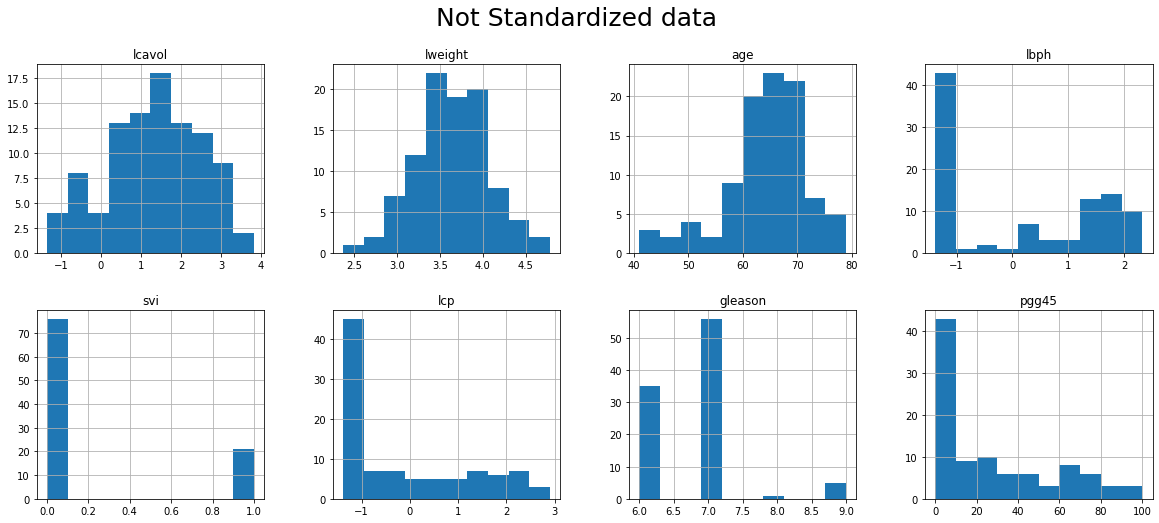

In [9]:
fig = plt.figure()

predictors.hist(grid=True, figsize=(20,8), layout = (2,4))

fig.tight_layout()
plt.suptitle("Not Standardized data", fontsize=25)

fig.show()

## **17. Show the basic statistics (min, max, mean, quartiles, etc. for each variable) in data**

In [10]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


## **18. Generate a new DataFrame called dataTrain and containing only the rows of data in which the train variable has value “T”**
* Hint: use the loc attribute of DataFrame to access a groups of rows and columns by label(s) or boolean arrays
* How many rows and columns does dataTrain have?

In [11]:
dataTrain = data.loc[train == 'T'] # Obviously, len(idx)==len(dataTrain) is True!

# # Alternative way:
# # 1. Get the indexes corresponding to train ==  'T'
# idxTrain = train.loc[train == 'T'].index.tolist() 
# # 2. Access to interesting rows with .iloc()
# dataTrain = data.iloc[idxTrain]

print(f"dataTrain contains {dataTrain.shape[0]} rows and {dataTrain.shape[1]} columns.")

dataTrain contains 67 rows and 8 columns.


## **19. Generate a new DataFrame called dataTest and containing only the rows of data in which the train variable has value “F”**
* How many rows and columns does dataTest have?

In [12]:
dataTest = data.loc[train == 'F']

## **20. Generate a new Series called lpsaTrain and containing only the values of variable lpsa in which the train variable has value “T”**
* How many valuses does lpsaTrain have?

In [13]:
# Create a new Series variable
lpsaTrain = lpsa.loc[train == 'T']

# # Another way to define it
# data_all = pd.read_csv('../input/prostate-data/prostate.data',sep='\t')
# lpsaTrain = data_all.loc[train == 'T']['lpsa']

# # To check if it is correct:
# idxTrain = train.loc[train == 'T'].index.tolist()
# lpsaTrain == lpsa.iloc[idxTrain]

print(f"lpsaTrain has {lpsaTrain.shape[0]} values.")

lpsaTrain has 67 values.


## **21. Generate a new Series called lpsaTest and containing only the values of variable lpsa in which the train variable has value “F”**
* How many valuses does lpsaTest have?

In [14]:
lpsaTest = lpsa.loc[train == 'F']

# # To check if it is correct: 
# len(lpsaTest) == len(data)-len(lpsaTrain)

print(f"lpsaTrain has {lpsaTest.shape[0]} values.")

lpsaTrain has 30 values.


## **22. Show the correlation matrix among all the variables in dataTrain**
* Hint: use the correct method in DataFrame
* Hint: check if the values in the matrix correspond to those in Table 3.1 of the book

In [15]:
# Create correlation matrix
corrM = dataTrain.corr().round(decimals = 3) # As in the book, I plot values up to 3 decimals

# Display only the lower diagonal correlation matrix
lowerM = np.tril(np.ones(corrM.shape), k=-1) # Lower matrix of ones. (for k=0 I include also the main diagonal)
cond = lowerM.astype(bool) # Create a matrix of false, except in lowerM
corrM = corrM.where(cond, other='') # .where() replaces values with other where the condition is False.

corrM

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,,,,,,,,
lweight,0.3,,,,,,,
age,0.286,0.317,,,,,,
lbph,0.063,0.437,0.287,,,,,
svi,0.593,0.181,0.129,-0.139,,,,
lcp,0.692,0.157,0.173,-0.089,0.671,,,
gleason,0.426,0.024,0.366,0.033,0.307,0.476,,
pgg45,0.483,0.074,0.276,-0.03,0.481,0.663,0.757,


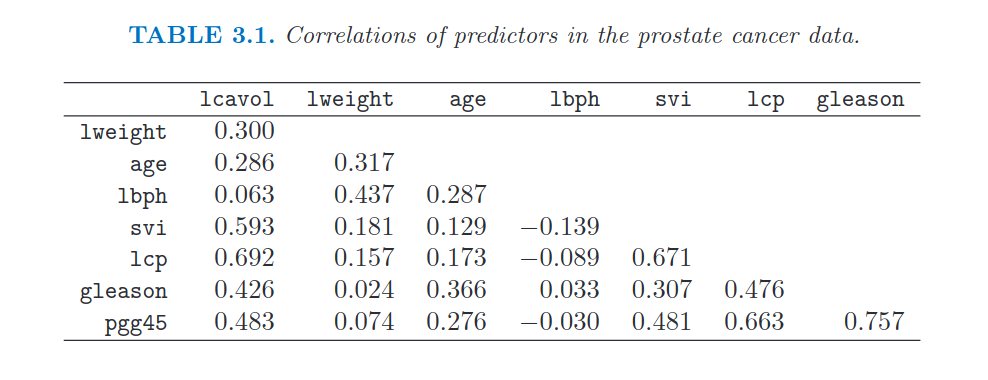

In [16]:
# We can compare the above correlation matrix with the one in the book:
Image("../input/prostate-data/tab.png")

## **23. Drop the column lpsa from the `dataTrain` DataFrame and save the result in a new DataFrame called `predictorsTrain`**

> <div class="alert alert-block alert-warning">
<b>Warning:</b> I can not drop `lpsa` from `dataTrain`, because I have already done it!
</div>

In fact:
- at step 14. I dropped `lpsa` from `data`
- at step 18. I created `dataTrain` from `data`, by selecting certain rows. So at this step `dataTrain` does not contain `lpsa`.

In [17]:
# predictorsTrain = dataTrain.drop['lpsa']

predictorsTrain = dataTrain

## **24. Drop the column `lpsa` from the dataTest DataFrame and save the result in a new DataFrame called `predictorsTest`**

In [18]:
dataTest.columns.tolist()

predictorsTest = dataTest

> <div class="alert alert-block alert-warning">
<b>Warning:</b> I can not drop `lpsa` from `dataTest`, because I have already done it!
</div>

In fact:
- at step 14. I dropped `lpsa` from `data`
- at step 19. I created `dataTest` from `data`, by selecting certain rows. So at this step `dataTest` does not contain `lpsa`.

## **25. Generate a new DataFrame called `predictorsTrain_std` and containing the standardized variables of DataFrame `predictorsTrain`**
* Hint: compute the mean of each column and save them in variable `predictorsTrainMeans`
* Hint: compute the standard deviation of each column and save them in variable `predictorsTrainStds`
* Hint: compute the standardization of each variable by the formula $$\frac{predictorsTrain - predictorsTrainMeans}{predictorsTrainStd}$$

In [19]:
predictorsTrainMeans = predictorsTrain.mean()
predictorsTrainStds = predictorsTrain.std()
predictorsTrain_std = (predictorsTrain - predictorsTrainMeans)/predictorsTrainStds # standardized cariables of predictorTrain

predictorsTrain_std

# Standardizing makes it easier to compare scores, even if those scores were measured on different scales.
# It also makes it easier to read results from regression analysis and ensures that all variables contribute to a scale when added together.

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.523680,-1.797414,-1.965590,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
1,-1.857204,-0.643057,-0.899238,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
2,-1.468157,-1.961526,1.233468,-0.995955,-0.533063,-0.836769,0.378996,-0.213934
3,-2.025981,-0.720349,-0.899238,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
4,-0.452342,-0.406493,-0.366061,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
...,...,...,...,...,...,...,...,...
90,1.555621,0.998130,0.433703,-0.995955,-0.533063,-0.836769,-1.031712,-0.896487
91,0.981346,0.107969,-0.499355,0.872223,1.847952,-0.836769,0.378996,-0.384573
92,1.220657,0.525153,0.433703,-0.995955,1.847952,1.096538,0.378996,1.151171
93,2.017972,0.568193,-2.765355,-0.995955,1.847952,1.701433,0.378996,0.468618


## **26. Show the histogram of each variables of predictorsTrain_std in a single figure**
* Use argument figsize to enlarge the figure if needed
* Hint: which kind of difference can you see in the histograms?

Now all the variables are centered at 0 and they variance equal to 1. So we can compare them in a better way.


<Figure size 432x288 with 0 Axes>

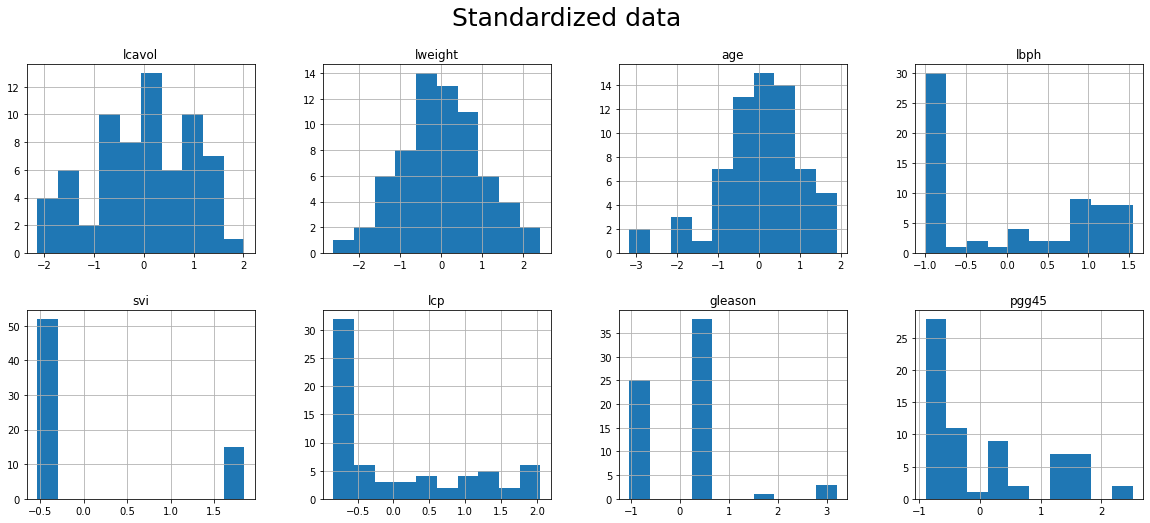

In [20]:
print("Now all the variables are centered at 0 and they variance equal to 1. So we can compare them in a better way.")
fig = plt.figure()

predictorsTrain_std.hist(grid=True, figsize=(20,8), layout = (2,4))

plt.suptitle("Standardized data", fontsize=25)
fig.tight_layout()

plt.show()

# Linear Regression

## **27. Generate a linear regression model using `predictorsTrain_std` as dependent variables and `lpsaTrain` as independent variable**
* Hint: find a function for linear regression model learning in sklearn (**fit**)
* How do you set parameter **fit_intercept**? Why?
> The parameter **`fit_intercept`** specifies wheter to calculate the intercept for this model.
>
> If **`fit_intercept` = False** sets the y-intercept to 0 (it is forced to 0), otherwise if **`fit_intercept` = True**, then the y-intercept will be determined by the line of best fit (it's allowed to "fit" the y-axis).
> As default **`fit_intercept`** is **True**.
>
> We set **`fit_intercept` = False** because after (the previous procedure) our data are centered.

* How do you set parameter **normalize**? Why? Can this parameter be used to simplify the generation of the predictor matrix?
> If **`fit_intercept` = False**, then the parameter **`normalize`** is ignored. If **`normalize` = True**, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
>
> By default **`normalize` = False**.
>
> We have already standardized our variables, so we set it as **False**.

In [21]:
# Create X_test
#predictorsTestMean = predictorsTest.mean()
predictorsTestStds = predictorsTest.std()
#predictorsTest_std = (predictorsTest - predictorsTestMeans)/predictorsTestStds # standardized cariables of predictorTrain
predictorsTest_std = (predictorsTest - predictorsTrainMeans)/predictorsTrainStds # standardized cariables of predictorTrain (BETTER WAY TO DO IT)

In [22]:
# Prepare the independent and dependent variables for the model

# Independent variables
X_train = predictorsTrain_std
X_test = predictorsTest_std

# Dependent variable
y_train = lpsaTrain
y_test = lpsaTest

In [23]:
linreg = LinearRegression() # we don't need to specify args, because the default ones are already good for us
linreg.fit(X_train,y_train)

# by default: fit_intercept = True and normalize = False
# This setting is good because we want to compute the intercept and we don't need to normalize X because we have already done it

LinearRegression()

## Difference in setting up **`fit_intercept`** in `LinearRegression`

Intercept when fit_intercept=True : 2.45235
Intercept when fit_intercept=False : 0.00000


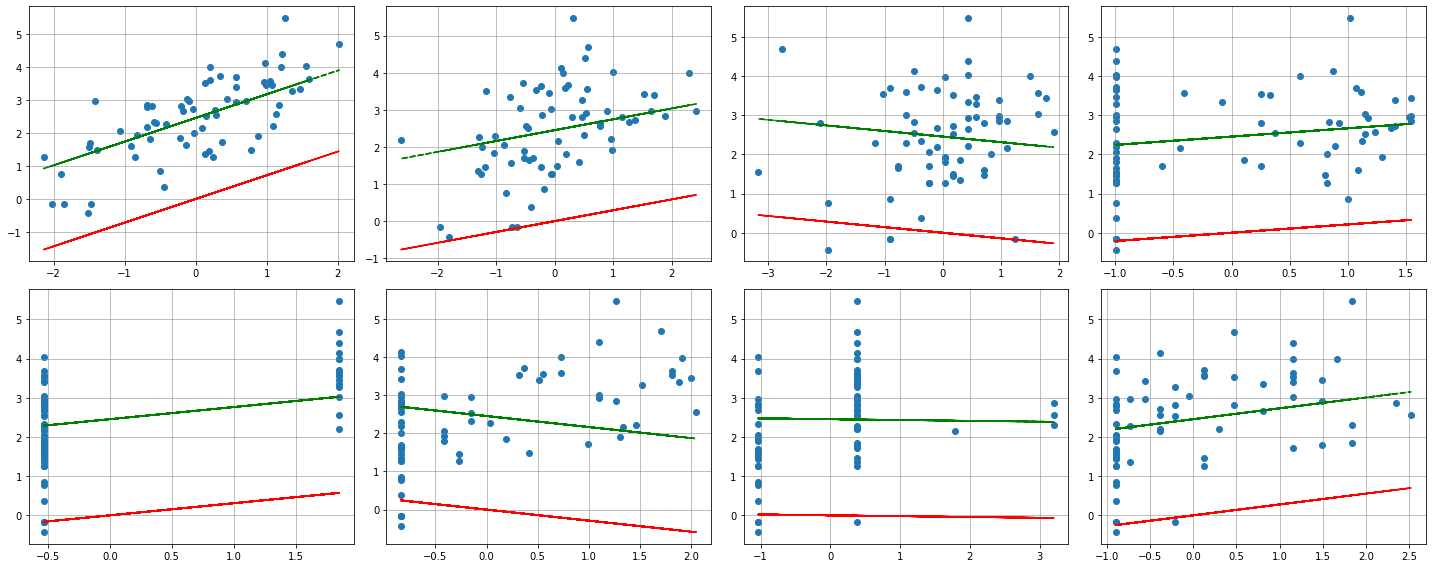

In [24]:
# Difference in setting up fit_intercept

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)

lr_fi_true.fit(X_train, y_train)
lr_fi_false.fit(X_train, y_train)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

## FIGURE
# SOURCE: https://stackoverflow.com/questions/46779605/in-the-linearregression-method-in-sklearn-what-exactly-is-the-fit-intercept-par

# fig properties
row = 2
col = 4
width = 20
height = 8

# initialize the figure
fig, axes = plt.subplots(row, col,figsize=(width,height))

for ax,variable in zip(axes.flatten(),X_train.columns.tolist()):
    ax.scatter(X_train[variable],y_train, label='Actual points')
    
    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    
    idx = X_train.columns.get_loc(variable) # get corresponding column index to access the right coeff
    
    lr_fi_true_yhat = np.dot(X_train[variable], lr_fi_true.coef_[idx]) + lr_fi_true.intercept_
    lr_fi_false_yhat = np.dot(X_train[variable], lr_fi_false.coef_[idx]) + lr_fi_false.intercept_
    
    ax.plot(X_train[variable], lr_fi_true_yhat, 'g--', label='fit_intercept=True')
    ax.plot(X_train[variable], lr_fi_false_yhat, 'r-', label='fit_intercept=False')

fig.tight_layout()

plt.show(fig) # force to show the plot after the print


In [25]:
lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_true.fit(X_train, y_train)
print(lr_fi_true.coef_,"\n",lr_fi_true.intercept_,"\n\n")

lr_fi_false = LinearRegression(fit_intercept=False)
lr_fi_false.fit(X_train, y_train)
print(lr_fi_true.coef_,"\n",lr_fi_false.intercept_)

[ 0.71640701  0.2926424  -0.14254963  0.2120076   0.30961953 -0.28900562
 -0.02091352  0.27734595] 
 2.4523450850746262 


[ 0.71640701  0.2926424  -0.14254963  0.2120076   0.30961953 -0.28900562
 -0.02091352  0.27734595] 
 0.0


## **28. Show the parameters of the linear regression model computed above. Compare the parameters with those shown in Table 3.2 of the book (page 50)**

In [26]:
col = ['Term','Coefficient'] # headers

intercept_val = np.array([linreg.intercept_]).round(2)
coeff_val = linreg.coef_.round(2)
intercept_label = np.array(['Intercept'])
coeff_label = X_train.columns.tolist()

terms = np.concatenate((intercept_val,coeff_val), axis=0)     
coeffs = np.concatenate((intercept_label,coeff_label),axis=0)

table = np.column_stack((coeffs,terms))

print(tabulate(table, headers=col, tablefmt='fancy_grid'))

╒═══════════╤═══════════════╕
│ Term      │   Coefficient │
╞═══════════╪═══════════════╡
│ Intercept │          2.45 │
├───────────┼───────────────┤
│ lcavol    │          0.72 │
├───────────┼───────────────┤
│ lweight   │          0.29 │
├───────────┼───────────────┤
│ age       │         -0.14 │
├───────────┼───────────────┤
│ lbph      │          0.21 │
├───────────┼───────────────┤
│ svi       │          0.31 │
├───────────┼───────────────┤
│ lcp       │         -0.29 │
├───────────┼───────────────┤
│ gleason   │         -0.02 │
├───────────┼───────────────┤
│ pgg45     │          0.28 │
╘═══════════╧═══════════════╛


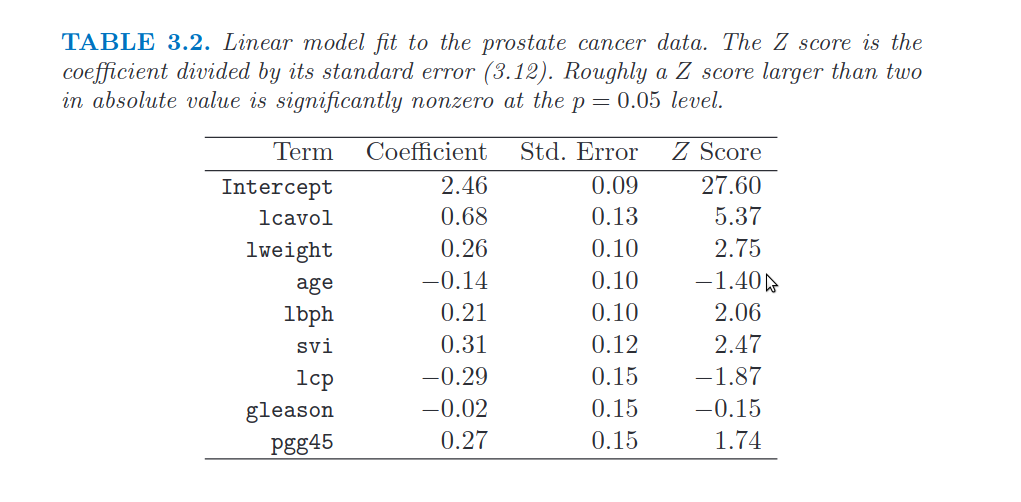

In [27]:
# We can compare the above correlation matrix with the one in the book:
Image("../input/prostate-data/tab2.png")

> <div class="alert alert-block alert-warning">
<b>Warning:</b> `lcavol` is not the same as in the book table.
</div>

## **29. Compute the coefficient of determination (i.e. $R^2$) of the prediction**

In [28]:
y_predicted = linreg.predict(X_test)
y_predicted

array([1.96903844, 1.16995577, 1.26117929, 1.88375914, 2.54431886,
       1.93275402, 2.04233571, 1.83091625, 1.99115929, 1.32347076,
       2.93843111, 2.20314404, 2.166421  , 2.79456237, 2.67466879,
       2.18057291, 2.40211068, 3.02351576, 3.21122283, 1.38441459,
       3.41751878, 3.70741749, 2.54118337, 2.72969658, 2.64055575,
       3.48060024, 3.17136269, 3.2923494 , 3.11889686, 3.76383999])

In [29]:
# Predicting the accuracy score
score = r2_score(y_test,y_predicted) # godness of fit measure for linreg
score2 = mean_squared_error(y_test,y_predicted)
#coeff = round(linreg.score(X,y),4)

print(f"The coefficient of determination (i.e. R^2) of the prediction is {round(score,3)}\n\
The mean squared error is: {round(score2,3)}.\n\
The root of the mean squared error is {round(np.sqrt(score2),3)}")

The coefficient of determination (i.e. R^2) of the prediction is 0.503
The mean squared error is: 0.521.
The root of the mean squared error is 0.722


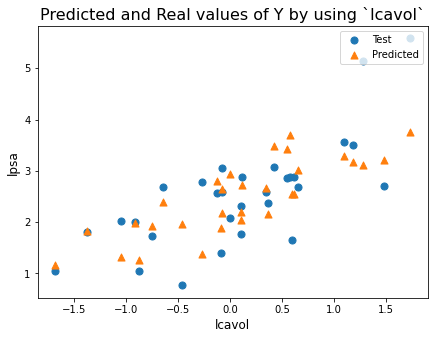

In [30]:
plt.figure(figsize=[7,5])
plt.scatter(X_test['lcavol'],y_test, marker='o', s = 50)
plt.scatter(X_test['lcavol'],y_predicted, marker='^', s = 50)
plt.title('Predicted and Real values of Y by using `lcavol`',fontsize=16)

plt.legend(labels = ['Test','Predicted'],loc = 'upper right')
plt.xlabel('lcavol',fontsize=12)
plt.ylabel('lpsa',fontsize=12)

plt.show()

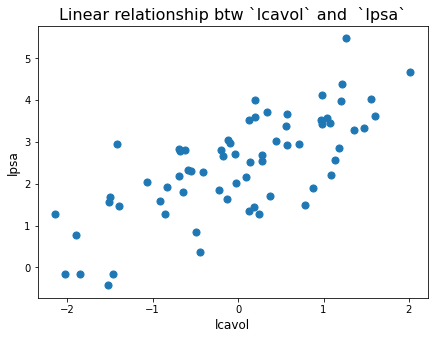

In [31]:
plt.figure(figsize=[7,5])
plt.scatter(predictorsTrain_std['lcavol'],lpsaTrain, marker='o', s = 50)
plt.title('Linear relationship btw `lcavol` and  `lpsa`',fontsize=16)

plt.xlabel('lcavol',fontsize=12)
plt.ylabel('lpsa',fontsize=12)

plt.show()

# in this case linear regression is nice!

In [32]:
data_all = pd.read_csv('../input/prostate-data/prostate.data',sep='\t')
data_all = data_all.drop(labels = ['Unnamed: 0'],axis=1)

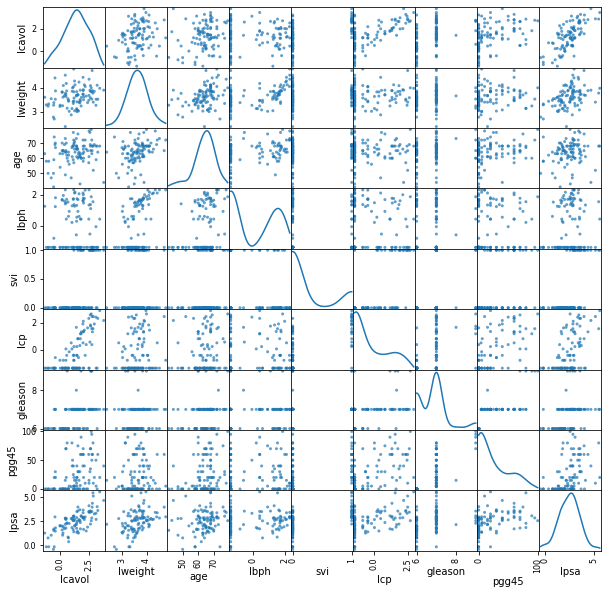

In [33]:
featuresToPlot = data_all.columns.tolist()
dataToPlot = data_all[featuresToPlot]

pd.plotting.scatter_matrix(dataToPlot, alpha = 0.7, diagonal = 'kde', figsize=(10,10))

plt.show()

Before doing Linear Regression it is nice to know the relationship btw the variables.
As shown in the boox, after the calculations of Z-score ( which is the effect of dropping that variable form the model), lweight, svi and lcavol have the strongest relationship. Here wecan see some plots.

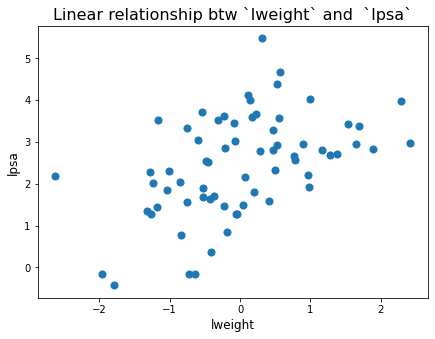

In [34]:
plt.figure(figsize=[7,5])
plt.scatter(predictorsTrain_std['lweight'],lpsaTrain, marker='o', s = 50)
plt.title('Linear relationship btw `lweight` and  `lpsa`',fontsize=16)

plt.xlabel('lweight',fontsize=12)
plt.ylabel('lpsa',fontsize=12)

plt.show()

# in this case linear regression is nice!

We can see how these relationships are linear. We can see linearity from the plot.

In [35]:
r2test = round(linreg.score(X_test,lpsaTest),2)
r2train = round(linreg.score(X_train,lpsaTrain),2)

print(f"Coefficient of determination for Test set is {r2test}\n\
Coefficient of determination for Test set is {r2train}") # it's higher because the model is created by using train set 

Coefficient of determination for Test set is 0.5
Coefficient of determination for Test set is 0.69


## **30. Compute the standard errors, the Z scores (Student’s t statistics) and the related p-values**
* Hint: use library `statsmodels instead of sklearn
* Hint: compare the results with those in Table 3.2 of the book (page 50)

In [36]:
y_predicted = linreg.predict(X_test)

X_trainC = sm.add_constant(X_train) # We need this in order to have an intercept
                        # otherwise we will no have the costant (it would be 0)

model = sm.OLS(y_train,X_trainC) # define the OLS (Ordinary Least Square - Linear Regression model)

results = model.fit() # fit the model

results.params # Coefficients of the model
results.summary(slim=True)

# Adjusted R^2 is the r^2 scaled by the number of parameters in the model
# F-statistics tells if the value of R^2 is significant or not.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
No. Observations:                  67   F-statistic:                     16.47
Covariance Type:            nonrobust   Prob (F-statistic):           2.04e-12
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4523      0.087     28.182      0.000       2.278       2.627
lcavol         0.7164      0.134      5.366      0.000       0.449       0.984
lweight        0.2926      0.106      2.751      0.008       0.080       0.506
age           -0.1425      0.102     -1.396      0.168      -0.347       0.062
lbph           0.2120      0.103      2.056      0.044       0.006       0.418
svi            0.3096      0.125      2.469      0.017       0.059       0.561
lcp           -0.2890      0.155     -1.867      0.067      -0.599       0.021
gleason       -0.0209      0.143     -0.147      0.884      -0.306       0.264
pgg45          0.2773      0.160      1.738      0.088      -0.042       0.597
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **`std_err`**: Our std error is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points.
* **`t`**: The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.
* **`P>|t|`**: It uses the t statistic to produce the p value, a measurement of *how likely your coefficient is measured through our model by chance*. The p value of 0.378 for Wealth is saying there is a 37.8% chance the Wealth variable has no affect on the dependent variable, Lottery, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.

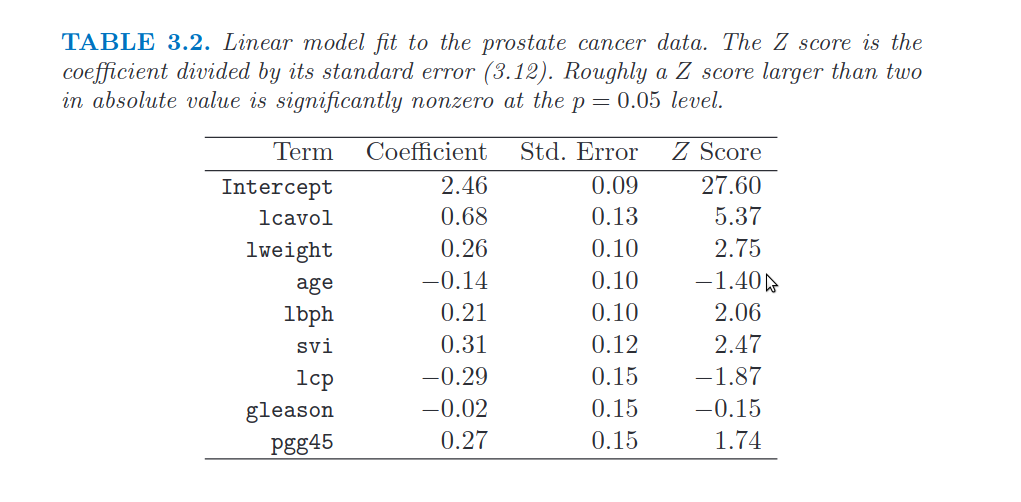

In [37]:
# We can compare the above correlation matrix with the one in the book:
Image("../input/prostate-data/tab2.png")

## Difference between statsmodel OLS and scikit linear regression, [source](https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression)

Linear regression is in its basic form the same in **statsmodels** and in **scikit-learn**. However, the implementation differs which might produce different results [...].

The most important difference is in the surrounding infrastructure and the use cases that are directly supported.

* **Statsmodels** follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is.
* **Scikit-learn** follows the machine learning tradition where the main supported task is chosing the "best" model for prediction.

As a consequence:
* the emphasis in the supporting features of **statsmodels** is in *analysing the training data*, which includes hypothesis tests and goodness-of-fit measure; 
* while the emphasis in the supporting infrastructure in **scikit-learn** is on *model selection* for out-of-sample prediction and therefore cross-validation on "test data".

This points out the distinction, there is still quite a lot of overlap also in the usage. **statsmodels** also does prediction, and additionally forecasting in a time series context. But, when we want to do cross-validation for prediction in statsmodels it is currently still often easier to reuse the cross-validation setup of **scikit-learn** together with the estimation models of statsmodels.